In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

input_folder = r"D:\leafdisease"
output_folder = r"D:\leafdisease_split"
os.makedirs(output_folder, exist_ok=True)
for subset in ['train', 'test', 'val']:
    for class_name in os.listdir(input_folder):
        os.makedirs(os.path.join(output_folder, subset, class_name), exist_ok=True)
for class_name in os.listdir(input_folder):
    class_path = os.path.join(input_folder, class_name)
    if not os.path.isdir(class_path):
        continue
    images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    test, val = train_test_split(temp, test_size=1/3, random_state=42)
    for img in train:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_folder, 'train', class_name, img)
        shutil.copy2(src, dst)
    
    for img in val:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_folder, 'val', class_name, img)
        shutil.copy2(src, dst)
    
    for img in test:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_folder, 'test', class_name, img)
        shutil.copy2(src, dst)

print("Success！")

In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob as gb
import os

In [2]:
from pathlib import Path
trainpath=Path("./leafdisease_split/train")
testpath=Path("./leafdisease_split/val")
predpath=Path("./leafdisease_split/test")

for folder in trainpath.iterdir():
    if folder.is_dir():
        files = list(folder.glob("*.jpg"))
        print(f'train文件夹 {folder.name} 中找到 {len(files)} 张图片')

train文件夹 Bacterial spot 中找到 434 张图片
train文件夹 Black mold 中找到 278 张图片
train文件夹 Gray spot 中找到 354 张图片
train文件夹 health 中找到 474 张图片
train文件夹 Late blight 中找到 385 张图片
train文件夹 Powdery mildew 中找到 674 张图片


In [3]:
for folder in testpath.iterdir():
    if folder.is_dir():
        files = list(folder.glob("*.jpg"))
        print(f'test文件夹 {folder.name} 中找到 {len(files)} 张图片')

pred_files = list(predpath.glob("*.jpg"))
print(f'pred文件夹中找到 {len(pred_files)} 张图片')

test文件夹 Bacterial spot 中找到 125 张图片
test文件夹 Black mold 中找到 80 张图片
test文件夹 Gray spot 中找到 102 张图片
test文件夹 health 中找到 136 张图片
test文件夹 Late blight 中找到 110 张图片
test文件夹 Powdery mildew 中找到 192 张图片
pred文件夹中找到 374 张图片


In [4]:
code_train ={"Bacterial spot" : 0, "Black mold" :1 , "Gray spot" :2 , "health" :3 , "Late blight" :4 , "Powdery mildew" :5 }
def getcode_train(n):
    for x,y in code_train.items():
        if n==y:
            return x
code_train["health"]

3

In [5]:
code_test = {"Bacterial spot" : 0, "Black mold" :1 , "Gray spot" :2 , "health" :3 , "Late blight" :4 , "Powdery mildew" :5 }
def getcode_test(n):
    for x,y in code_test.items():
        if n==y:
            return x
code_test["Gray spot"]

2

In [6]:
size=[]
for folder in trainpath.iterdir():
    files = list(folder.glob("*.jpg"))
    for file in files:
        image=plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(227, 227, 3)    2599
Name: count, dtype: int64

In [7]:
s = 224
x_train = []
y_train = []
for folder in trainpath.iterdir():
    files = list(folder.glob("*.jpg"))
    for file in files:
        image=cv.imread(file)
        if image is None:
            continue
        image_array = cv.resize(image,(s,s))
        x_train.append(list(image_array))
        y_train.append(code_train[folder.name])

print(f'we have {len(x_train)} items in x_train')

import random
random.shuffle([x_train,y_train])
temp = list(zip(x_train, y_train))
random.shuffle(temp)
x_train, y_train = zip(*temp)
x_train, y_train = list(x_train), list(y_train)
print(y_train[:10]) 

we have 2599 items in x_train
[3, 4, 3, 3, 2, 0, 1, 5, 0, 2]


In [8]:
x_test = []
y_test = []
for folder in testpath.iterdir():
    files = list(folder.glob("*.jpg"))
    for file in files:
        image = cv.imread(file)
        image_array = cv.resize(image,(s,s))
        x_test.append(list(image_array))
        y_test.append(code_test[folder.name])

In [9]:
x_pred = []
pred_files = list(predpath.glob("*.jpg"))
for file in pred_files:
    image = cv.imread(file)
    image_array = cv.resize(image , (s , s))
    x_pred.append(list(image_array))
print(f'we have {len(x_pred)} items in x_pred')

we have 374 items in x_pred


In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_pred_array = np.array(x_pred)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)
(1025, 150, 150, 3)
(1025,)
(2300, 150, 150, 3)
(2300,)
print(x_test.shape)
(1025, 150, 150, 3)
print(y_train[:100])

(745, 224, 224, 3)
(745,)
(2599, 224, 224, 3)
(2599,)
(745, 224, 224, 3)
[3 4 3 3 2 0 1 5 0 2 3 3 5 0 3 4 3 3 0 2 5 5 5 0 3 1 3 5 0 1 2 3 2 2 0 3 3
 2 0 2 2 4 2 0 5 0 0 5 3 0 2 3 3 3 5 5 4 3 3 4 3 3 3 0 4 5 4 3 4 1 1 2 3 5
 5 2 0 5 5 4 2 2 0 5 5 2 4 5 5 4 1 2 2 1 0 0 2 5 4 1]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    # input
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    # conv1
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    # conv2
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    # conv3
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    # FC
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    # output
    layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


c:\Users\Jzh\anaconda3\envs\leafdisease\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 108, 108, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 106, 106, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 51, 51, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 49, 49, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    75,497,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 76,782,918 (292.90 MB)

 Trainable params: 76,779,590 (292.89 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [ ]:
epochs=30   
print(x_train.shape,y_train.shape)
model.fit(x_train, y_train , epochs=epochs, batch_size = 32 , verbose=1)
model.save('leafdisease.h5')

(2599, 224, 224, 3) (2599,)
82/82 ━━━━━━━━━━━━━━━━━━━━ 395s 5s/step - accuracy: 0.9601 - loss: 0.1258


In [16]:
ModelLoss,ModelAccuracy = model.evaluate(x_test,y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 613ms/step - accuracy: 0.6679 - loss: 1.2485
Test Loss is 1.2762221097946167
Test Accuracy is 0.6751677989959717


In [17]:
y_pred =model.predict(x_test)
print('prediction shape is {} '.format(y_pred.shape))
y_result = model.predict(x_pred_array)
print('prediction shape is {}'.format(y_result.shape))

24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 598ms/step
prediction shape is (745, 6) 
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 576ms/step
prediction shape is (374, 6)


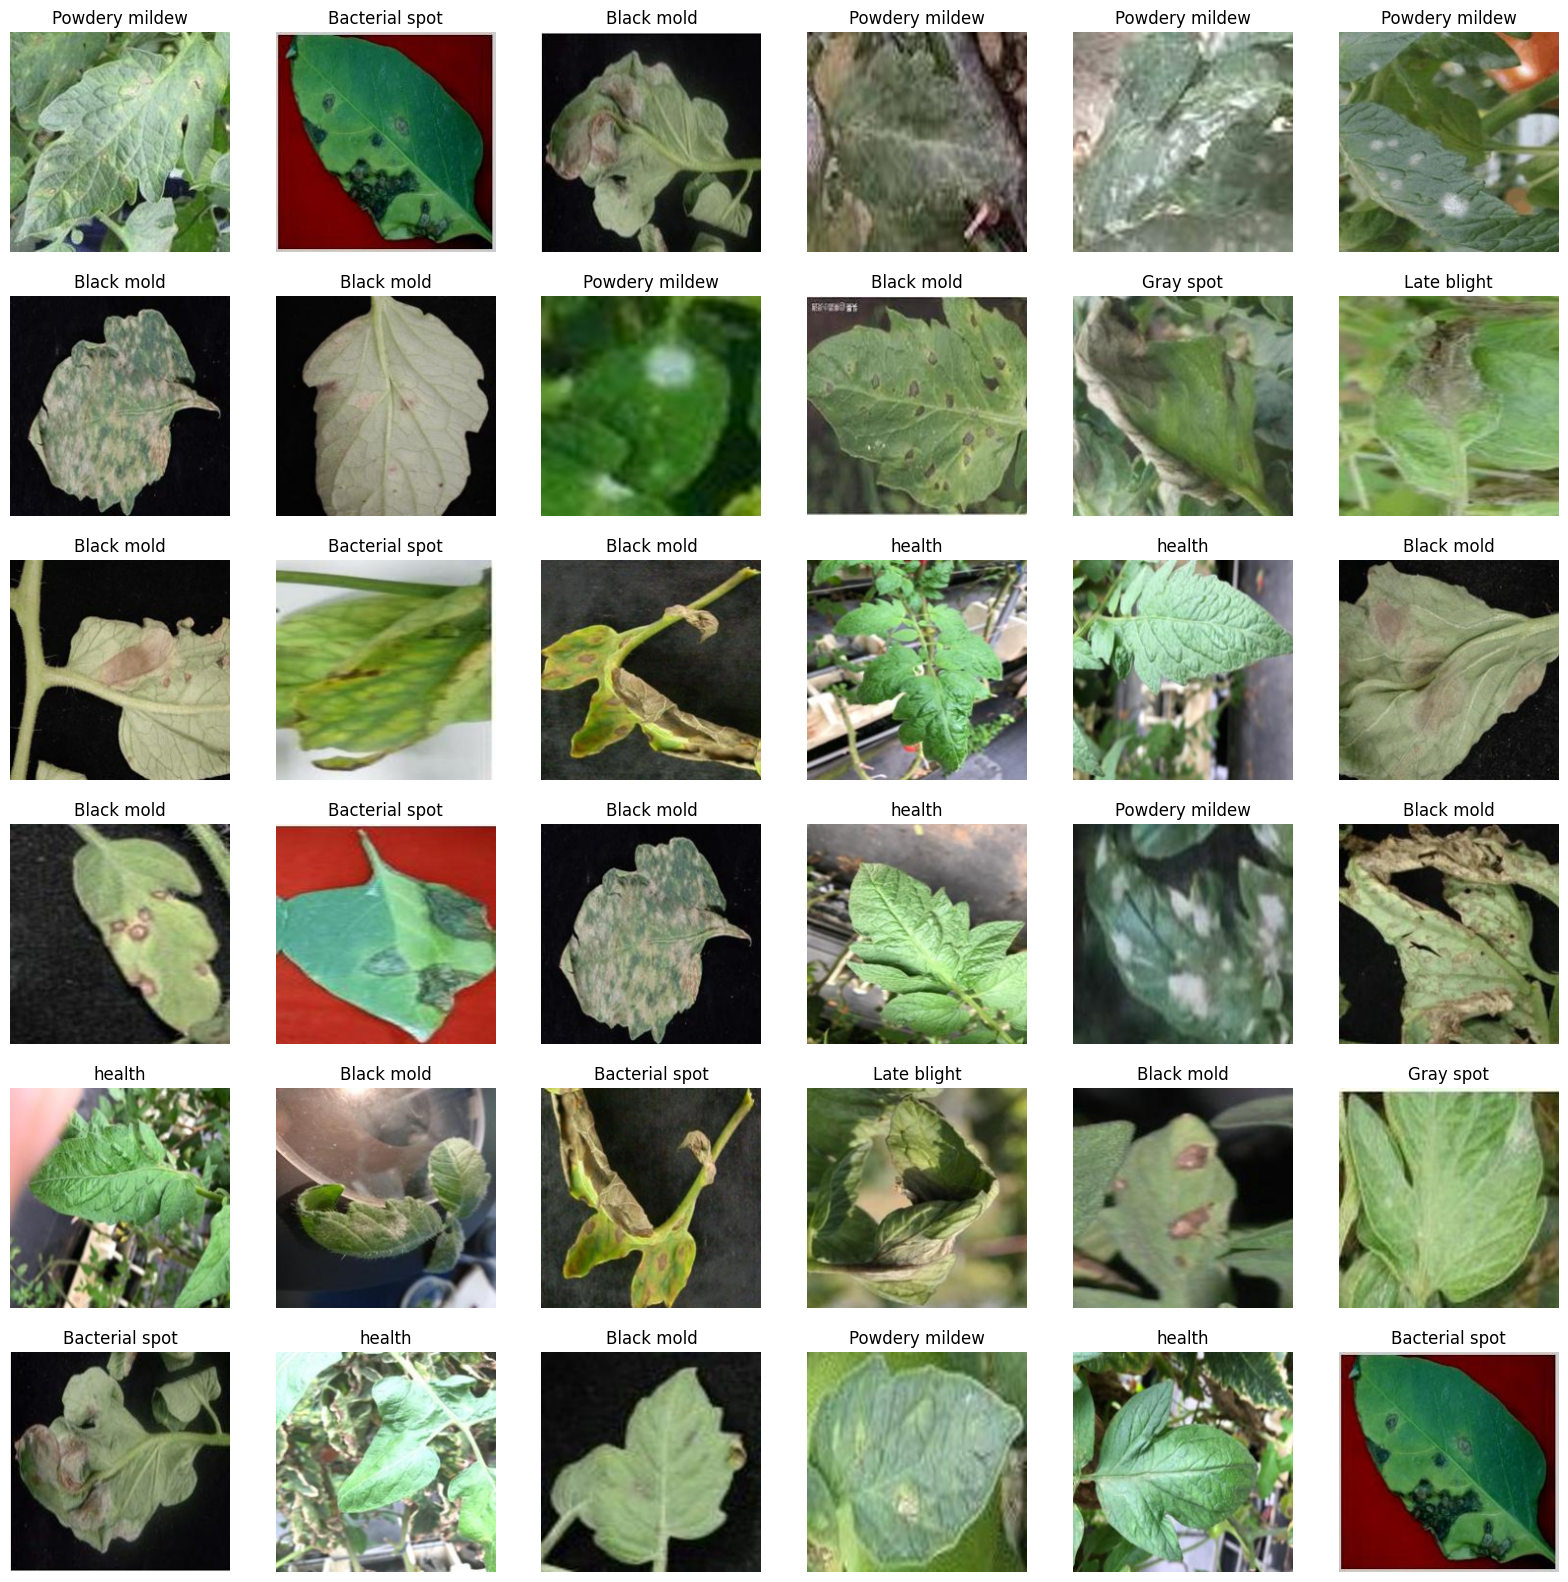

In [19]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(x_pred),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(cv.cvtColor(np.array(x_pred[i]), cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(getcode_train(np.argmax(y_result[i])))